**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [4]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                                  # Getting all the Libraries. 
from fastai.vision.all import *                         # Getting all the Libraries. 

**GETTING THE DATA:**
- I will download the [**Pets**](https://www.robots.ox.ac.uk/~vgg/data/pets/) dataset. 

In [5]:
#@ GETTING THE DATA: 
path = untar_data(URLs.PETS)                           # Getting Path to the Dataset. 
path.ls()                                              # Inspecting the Path. 

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

**Note:**
- The dataset provides images and annotations directories. The [**Pets**](https://www.robots.ox.ac.uk/~vgg/data/pets/) dataset website tells that the annotations directory contains information about where the pets are rather than what they are. Since it is a **Classification** rather than **Localization**, I will ignore the annotations directory for now. 

In [6]:
#@ INSPECTING IMAGES DIR: 
(path/"images").ls()                                    # Inspecting Images. 

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/pug_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_30.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_52.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_129.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_42.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_38.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_64.jpg')...]

In [12]:
#@ GETTING ONE IMAGE: 
fname = (path/"images").ls()[0]                          # Getting an Image. 
re.findall(r"(.+)_\d+.jpg$", fname.name)                 # Extracting. 

['pug']

**INITIALIZING DATABLOCK AND DATALOADERS:**

In [14]:
#@ INITIALIZING DATABLOCK: 
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),                        # Initializing DataBlock. 
                 get_items=get_image_files,                                 # Getting Image Files. 
                 splitter=RandomSplitter(seed=42),                          # Getting Random Splitting of Dataset. 
                 get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"),"name"),  # Getting Labels.  
                 item_tfms=Resize(460),                                     # Resizing Images. 
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))       # Batch Augmentation.

#@ INITIALIZING DATALOADERS: 
dls = pets.dataloaders(path/"images")                                       # Initializing DataLoaders. 

**Note:**
- I have used **Resize** as an item transform with a large size and **RandomResizedCrop** as a batch transform with a smaller size. **RandomResizedCrop** will be added if min scale parameter is passed in aug transforms function as was done in **DataBlock** call above. 

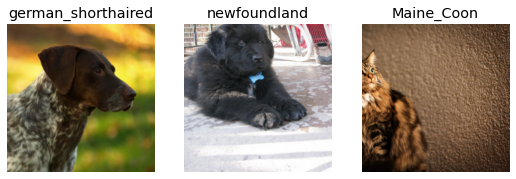

In [15]:
#@ INSPECTING IMAGES: 
dls.show_batch(nrows=1, ncols=3)                                             # Inspecting Images. 

**CHECKING AND DEBUGGING DATABLOCK:**


In [17]:
#@ INITIALIZING DATABLOCK: 
pets1 = DataBlock(blocks=(ImageBlock, CategoryBlock),                       # Initializing DataBlock. 
                 get_items=get_image_files,                                 # Getting Image Files. 
                 splitter=RandomSplitter(seed=42),                          # Getting Random Splitting of Dataset. 
                 get_y=using_attr(RegexLabeller(r"(.+)_\d+.jpg$"),"name"))  # Getting Labels. 

#@ INSPECTING SUMMARY: UNCOMMENT BELOW:
# pets1.summary(path/"images") 

**TRAINING THE MODEL:**

In [19]:
#@ TRAINING THE MODEL: INITIALI TEST: 
learn = cnn_learner(dls, resnet34, metrics=error_rate)                      # Initializing Pretrained Convolutions. 
learn.fine_tune(2)                                                          # Training the Model. 

epoch,train_loss,valid_loss,error_rate,time
0,1.575184,0.326338,0.105548,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.508398,0.297405,0.092693,01:10
1,0.330839,0.224080,0.070365,01:10
